In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#читаем данные
data = pd.read_csv('apple_quality.csv', sep=",")

In [3]:
# Первые 5 строк датасета
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
# 4001 строк и 9 колонок
data.shape

(4001, 9)

In [5]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [7]:
# Crunchiness - хрусткость, Ripeness - зрелость, Acidity - кислотность
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

<Axes: xlabel='Crunchiness', ylabel='Ripeness'>

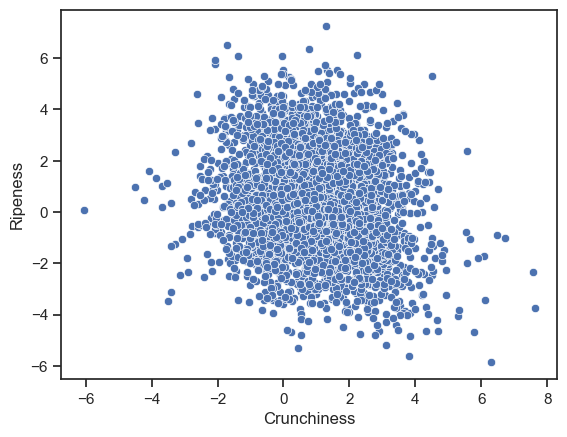

In [6]:
sns.scatterplot(x='Crunchiness', y='Ripeness', data=data)

In [11]:
def clean_data(df):
    
    df = df.drop(columns=['A_id'])
    
    df = df.dropna()
    
    df = df.astype({'Acidity': 'float64'})
    
    def label(Quality):
        """
        "good"  => 0
        "bad"   => 1
        """
        if Quality == "good":
            return 0
    
        if Quality == "bad":
            return 1
    
        return None
    
    df['Label'] = df['Quality'].apply(label)
    
    df = df.drop(columns=['Quality'])
    
    df = df.astype({'Label': 'int64'})
    
    return df

apples = clean_data(data.copy())
apples.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


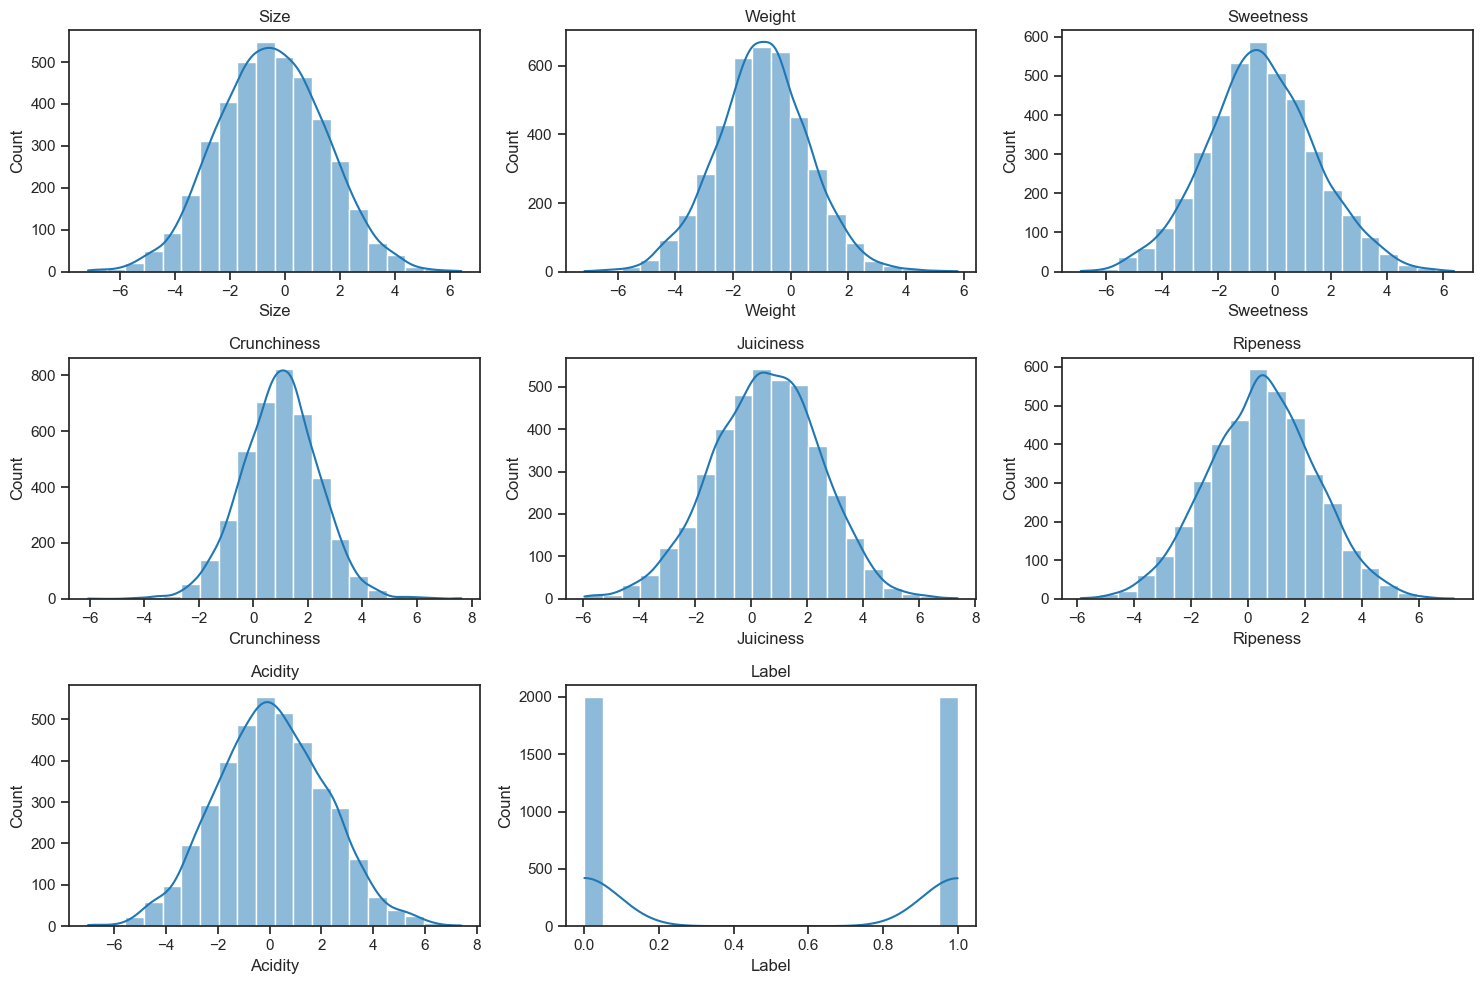

In [12]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Label']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=apples, x=column, kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

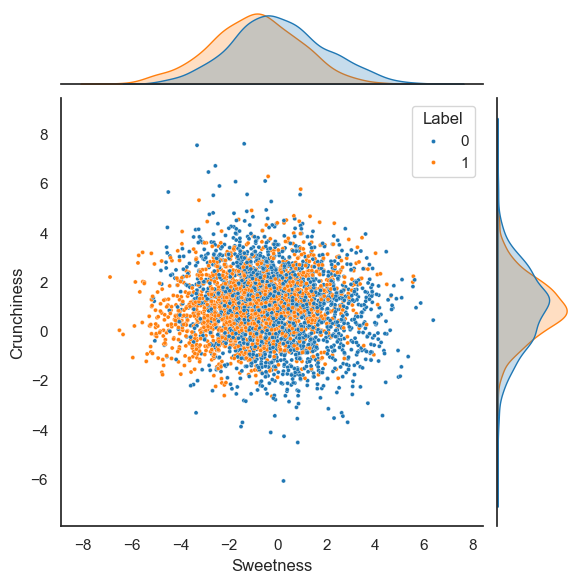

In [15]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Sweetness', y='Crunchiness', hue='Label', data=apples, palette='tab10', s=9)

<Axes: xlabel='Juiciness'>

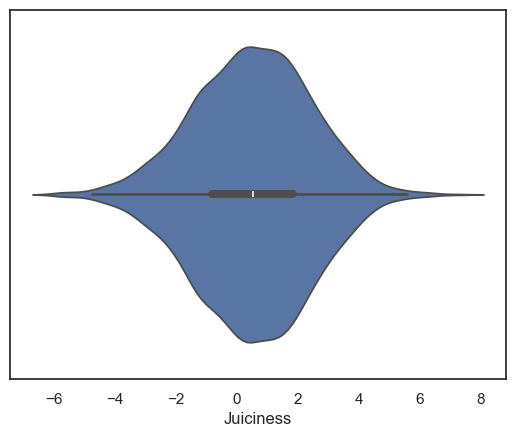

In [18]:
sns.violinplot(x=data['Juiciness'])

In [20]:
apples.corr()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,-0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,-0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,-0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,-0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,0.007697
Label,-0.244007,-0.001421,-0.250998,0.012376,-0.260223,0.264315,0.007697,1.000000


<Axes: >

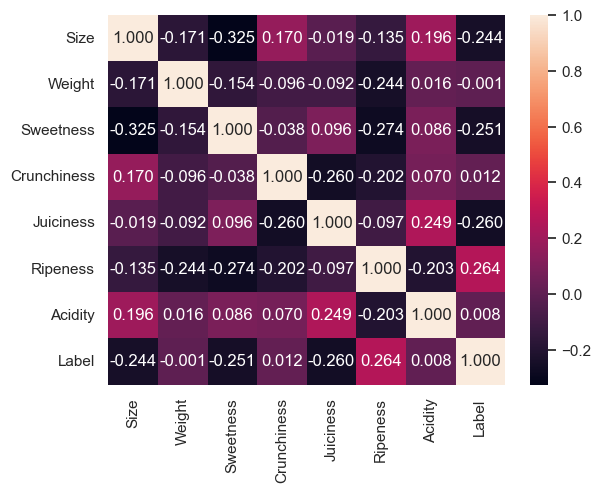

In [23]:
sns.heatmap(apples.corr(), annot=True, fmt='.3f')